In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
def generate_synthetic_data(n=100):
    np.random.seed(42)
    data = pd.DataFrame({
        'IT_Spending': np.random.normal(100000, 20000, n),
        'Cost_per_User': np.random.normal(200, 50, n),
        'Cloud_Cost': np.random.normal(30000, 5000, n),
        'OnPrem_Cost': np.random.normal(50000, 7000, n),
        'Software_Licensing': np.random.normal(20000, 3000, n),
        'Maintenance_Cost': np.random.normal(10000, 2000, n),
        'Hardware_Cost': np.random.normal(15000, 3000, n),
        'IT_Labor_Cost': np.random.normal(50000, 8000, n),
        'Energy_Cost': np.random.normal(8000, 1000, n),
        'Support_Efficiency': np.random.normal(20, 5, n),
        'Idle_Resources': np.random.randint(1, 10, n)
    })
    return data

# Generate data
data = generate_synthetic_data()
data.head()
# data.count()


,IT_Spending,Cost_per_User,Cloud_Cost,OnPrem_Cost,Software_Licensing,Maintenance_Cost,Hardware_Cost,IT_Labor_Cost,Energy_Cost,Support_Efficiency,Idle_Resources
0,109934.283060,129.231463,31788.936802,44197.034924,15216.717024,11852.355095,17270.965850,45818.215836,8938.283806,21.843367,7
1,97234.713977,178.967734,32803.922632,46078.732719,18201.874931,13818.833281,12233.504027,58392.073807,7483.955272,18.033306,1
2,112953.770762,182.864274,35415.256216,55231.055236,20015.731099,7202.864852,17608.817760,44365.250476,8096.120777,20.143724,8
3,130460.597128,159.886137,35269.010260,54272.591858,20140.941781,11125.938473,19066.913576,38732.309629,7537.724711,26.392259,3
4,95316.932506,191.935714,23111.653160,49853.688842,18649.803586,8698.714862,16240.304710,37546.966612,7565.503773,20.955495,6


In [23]:
# Cloud vs On-Premises Cost Ratio
data['Cloud_vs_OnPrem_Ratio'] = data['Cloud_Cost'] / (data['Cloud_Cost'] + data['OnPrem_Cost'])

# Calculate Total Cost per User
data['Total_Cost_per_User'] = (data['IT_Spending'] / data['Cost_per_User'])

# Annual Growth Rate 
data['Annual_Growth_Rate'] = data['IT_Spending'].pct_change().fillna(0)


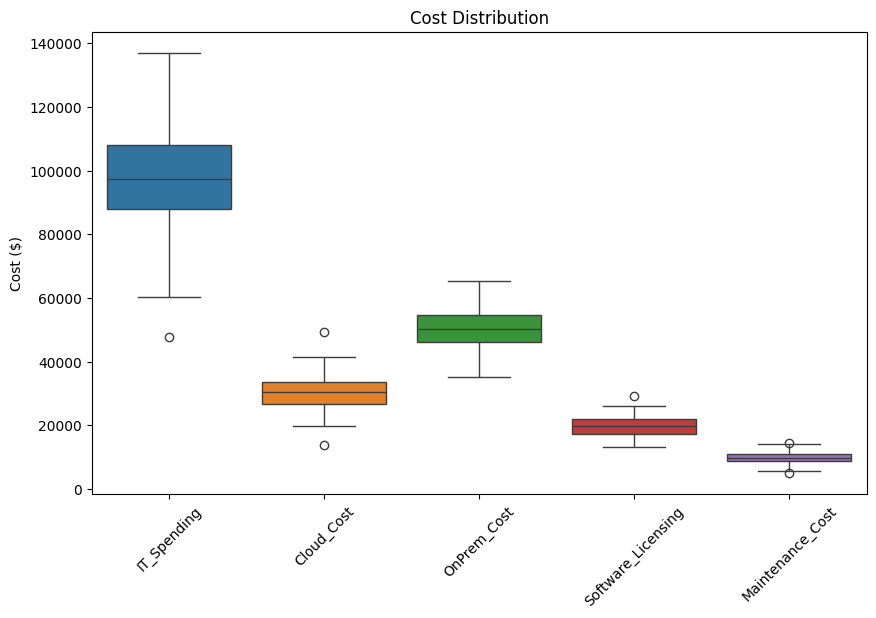

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['IT_Spending', 'Cloud_Cost', 'OnPrem_Cost', 'Software_Licensing', 'Maintenance_Cost']])
plt.title('Cost Distribution')
plt.ylabel('Cost ($)')
plt.xticks(rotation=45)
plt.show()


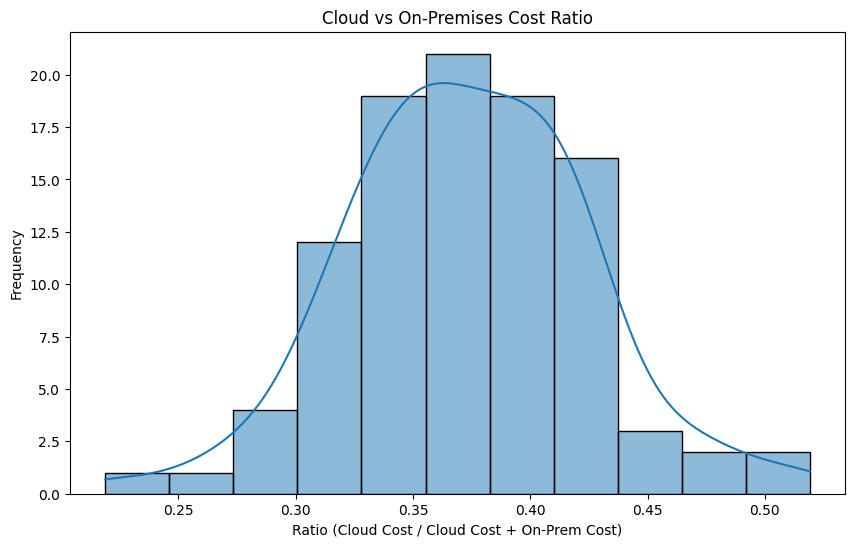

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Cloud_vs_OnPrem_Ratio'], kde=True)
plt.title('Cloud vs On-Premises Cost Ratio')
plt.xlabel('Ratio (Cloud Cost / Cloud Cost + On-Prem Cost)')
plt.ylabel('Frequency')
plt.show()


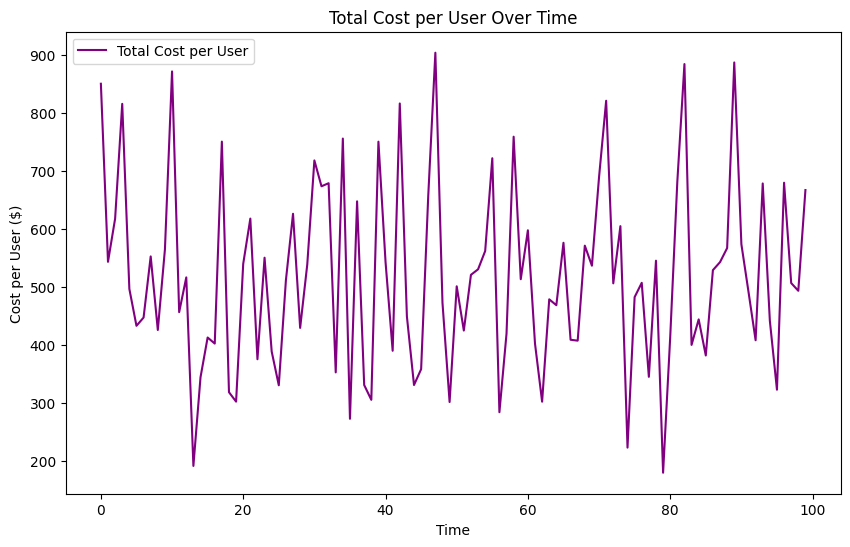

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(data['Total_Cost_per_User'], label='Total Cost per User', color='purple')
plt.title('Total Cost per User Over Time')
plt.xlabel('Time')
plt.ylabel('Cost per User ($)')
plt.legend()
plt.show()


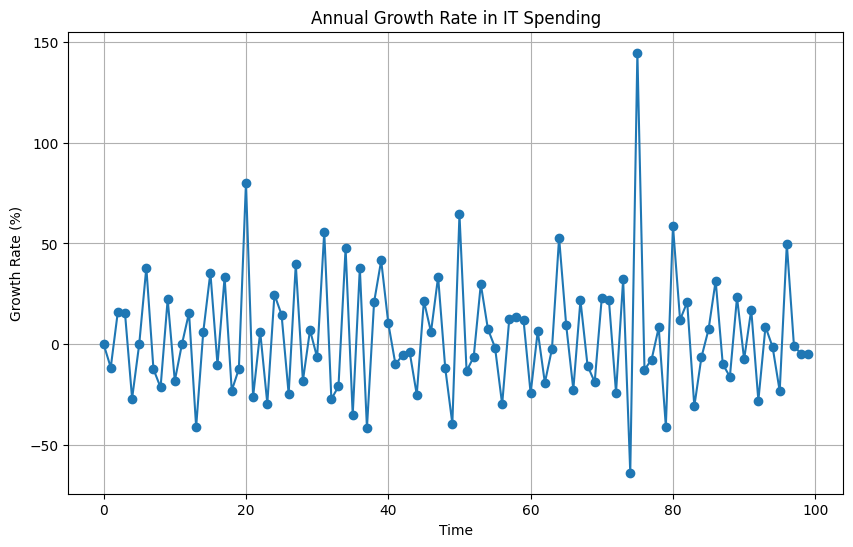

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(data['Annual_Growth_Rate'] * 100, marker='o')
plt.title('Annual Growth Rate in IT Spending')
plt.xlabel('Time')
plt.ylabel('Growth Rate (%)')
plt.grid()
plt.show()


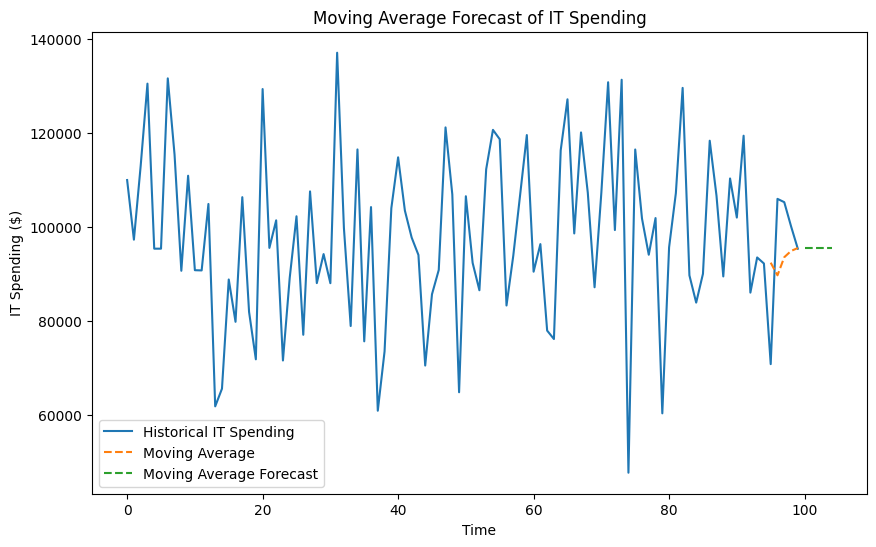

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate moving average
window_size = 5 
data['IT_Spending_MA'] = data['IT_Spending'].rolling(window=window_size).mean()

# Forecast next 5 periods 
forecast_periods = 5
last_moving_average = data['IT_Spending_MA'].iloc[-1]
forecast_values = np.repeat(last_moving_average, forecast_periods)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(data['IT_Spending'], label='Historical IT Spending')
plt.plot(data.index[-forecast_periods:], data['IT_Spending_MA'][-forecast_periods:], label='Moving Average', linestyle='--')
plt.plot(range(len(data), len(data) + forecast_periods), forecast_values, label='Moving Average Forecast', linestyle='--')
plt.legend()
plt.title(f'Moving Average Forecast of IT Spending')
plt.xlabel('Time')
plt.ylabel('IT Spending ($)')
plt.show()


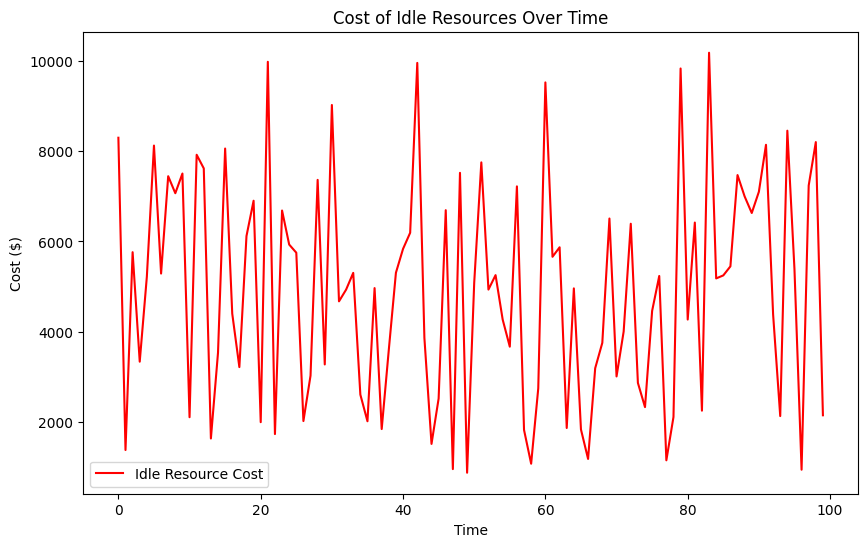

In [29]:
data['Idle_Resource_Cost'] = data['Idle_Resources'] * data['Maintenance_Cost'] * 0.1  # Assumed cost factor

plt.figure(figsize=(10, 6))
plt.plot(data['Idle_Resource_Cost'], label='Idle Resource Cost', color='red')
plt.title('Cost of Idle Resources Over Time')
plt.xlabel('Time')
plt.ylabel('Cost ($)')
plt.legend()
plt.show()
